In [1]:
import torch
import pandas as pd
from tqdm.notebook import tqdm


In [2]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/train_all_tasks.csv")
df.shape

(14000, 5)

In [3]:
df.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
5,sexism2022_english-10376,yeah but in order to keep the benefit i have t...,not sexist,none,none
6,sexism2022_english-4569,Hahaha I just wish they would live their truth...,not sexist,none,none
7,sexism2022_english-91,head mod said she talked to him after he made ...,not sexist,none,none
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
9,sexism2022_english-16316,We most definitely did. I didn’t go too much i...,not sexist,none,none


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


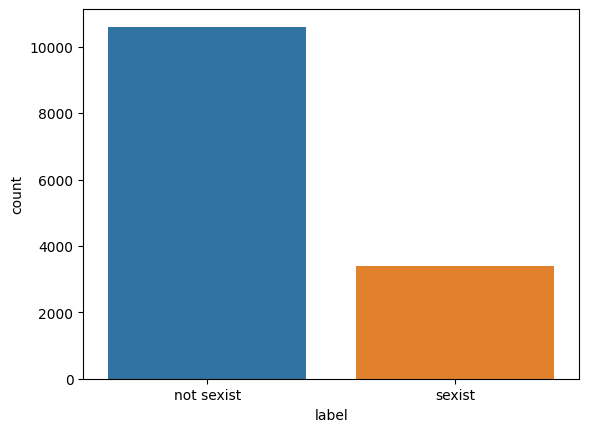

In [5]:
sns.countplot(x = df.label_sexist)
plt.xlabel('label');


In [6]:
# Encoding categorical data to integer labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_sexist'] = le.fit_transform(df['label_sexist'])
print(df['label_sexist'])

0        0
1        0
2        0
3        0
4        0
        ..
13995    1
13996    0
13997    0
13998    0
13999    0
Name: label_sexist, Length: 14000, dtype: int32


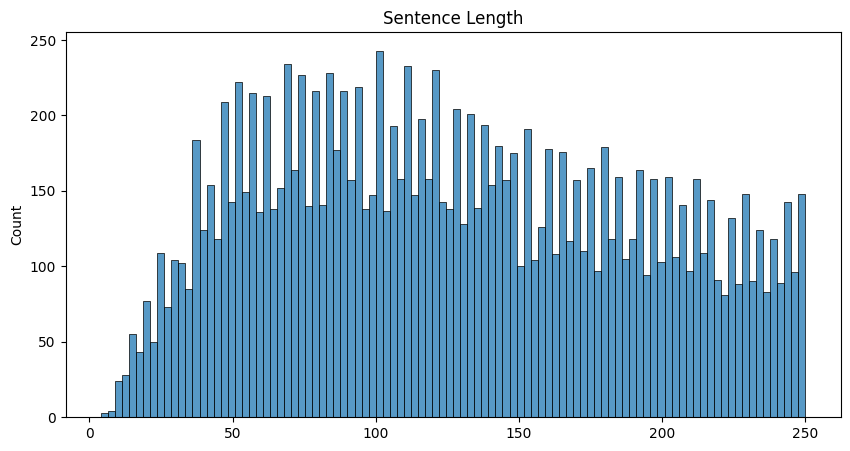

In [7]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()


In [8]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)


Max length:  250


In [9]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label_sexist.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label_sexist.values)


In [10]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()


,rewire_id,text,label_sexist,label_category,label_vector,data_type
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",0,none,none,not_set
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",0,none,none,not_set
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,0,none,none,not_set
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,0,none,none,not_set
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,0,none,none,not_set


In [11]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'


In [12]:
df.groupby(['label_sexist', 'data_type']).count()


rewire_id  text  label_category  label_vector
label_sexist data_type                                               
0            train           9012  9012            9012          9012
             val             1590  1590            1590          1590
1            train           2888  2888            2888          2888
             val              510   510             510           510

TOKENIZATION

In [13]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


In [14]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)


In [15]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [16]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


In [17]:
encoded_data_train


{'input_ids': tensor([[ 101, 4365, 1010,  ...,    0,    0,    0],
        [ 101, 2129, 1996,  ...,    0,    0,    0],
        [ 101, 3305, 1012,  ...,    0,    0,    0],
        ...,
        [ 101, 8840, 2140,  ...,    0,    0,    0],
        [ 101, 2009, 1005,  ...,    0,    0,    0],
        [ 101, 2129, 2064,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

ENCODING

In [18]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label_sexist.values)


In [19]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label_sexist.values)


In [20]:
input_ids_train


tensor([[ 101, 4365, 1010,  ...,    0,    0,    0],
        [ 101, 2129, 1996,  ...,    0,    0,    0],
        [ 101, 3305, 1012,  ...,    0,    0,    0],
        ...,
        [ 101, 8840, 2140,  ...,    0,    0,    0],
        [ 101, 2009, 1005,  ...,    0,    0,    0],
        [ 101, 2129, 2064,  ...,    0,    0,    0]])

In [21]:
attention_masks_train


tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [22]:
labels_train


tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.int32)

In [23]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [24]:
print(len(dataset_train))
print(len(dataset_val))


11900
2100


In [25]:
dataset_train


In [26]:
dataset_train.tensors


(tensor([[ 101, 4365, 1010,  ...,    0,    0,    0],
         [ 101, 2129, 1996,  ...,    0,    0,    0],
         [ 101, 3305, 1012,  ...,    0,    0,    0],
         ...,
         [ 101, 8840, 2140,  ...,    0,    0,    0],
         [ 101, 2009, 1005,  ...,    0,    0,    0],
         [ 101, 2129, 2064,  ...,    0,    0,    0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.int32))


SET UP BERT PRETRAINED MODEL
```
# This is formatted as code
```



In [27]:
label_dict = {'not sexist': 0,'sexist': 1}

In [28]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [29]:
#model summary
model.config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Create Data Loaders

In [47]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [31]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [32]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics


In [33]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')


In [34]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [51]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2].type(torch.LongTensor).to(device)}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

TRAIN MODEL

In [36]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [40]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].type(torch.LongTensor).to(device)}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/2975 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.48484253435920016


  0%|          | 0/66 [00:00<?, ?it/s]

RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Int'

Model Evaluation


In [41]:
outputs.loss


tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward0>)

In [42]:
outputs.logits


tensor([[-2.0704,  0.7452],
        [ 1.8037, -1.9014],
        [ 2.1143, -2.7667],
        [-2.5153,  1.8889]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [43]:
#save model
model.to(device)
pass


In [52]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/66 [00:00<?, ?it/s]

In [53]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: not sexist
Accuracy:1493/1590

Class: sexist
Accuracy:345/510



In [54]:
predictions

array([[-1.9844629 ,  1.1032406 ],
       [ 0.90836877, -2.1529965 ],
       [-2.6419656 ,  2.5534449 ],
       ...,
       [-2.708647  ,  2.3805103 ],
       [-0.621114  , -0.81043845],
       [ 1.7410072 , -2.8436427 ]], dtype=float32)

In [55]:
true_vals

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [57]:
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

print(preds_flat)
print(labels_flat)

[1 0 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [60]:
accuracy = accuracy_score(y_true = labels_flat, y_pred = preds_flat )
f1 = f1_score(y_true = labels_flat, y_pred = preds_flat, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = labels_flat, y_pred = preds_flat ))

The accuracy from sentiment classification: 0.8752380952380953
with f1 score: 0.872088318085855
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1590
           1       0.78      0.68      0.72       510

    accuracy                           0.88      2100
   macro avg       0.84      0.81      0.82      2100
weighted avg       0.87      0.88      0.87      2100



Text(0.5, 1.0, 'Sentiment classification')

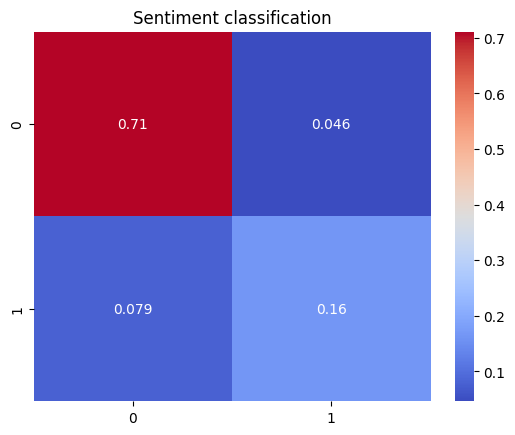

In [58]:

sns.heatmap(confusion_matrix(y_true= labels_flat, y_pred = preds_flat) / len(preds_flat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [61]:
import joblib
filename = 'final_model_A.sav'
joblib.dump(model, filename)

['final_model_A.sav']

In [ ]:
# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)